**Prática 3 – Validação Cruzada e Métricas De Avaliação**

**Aluno: Jorge Aliomar Trocoli Abdon Dantas**

**Objetivo(s):**

Nesta prática, você irá utilizar a função cross_validate da biblioteca scikit-learn para estimar o desempenho de diferentes algoritmos de classificação através de validação cruzada. A atividade propõe a comparação entre os resultados obtidos com validação cruzada e com uma simples divisão entre treino e teste.

Você você estiver com dúvidas em relação ao funcionamento básico de Python, assista os vídeos:
- https://didatica.tech/curso-de-python-online-para-iniciantes/
- https://www.youtube.com/watch?v=oUrBHiT-lzo

In [18]:
#Montar drive para leitura das Bases de Dados
#from google.colab import drive

#drive.mount('/gdrive')
#%cd /gdrive/MyDrive/2025-1_PraticasIC/Pratica02

In [19]:
#Importando Bibliotecas Pandas
import pandas as pd

In [20]:
#Carregando Base de dados
df_test = pd.read_csv("application_test.csv")
df_train = pd.read_csv("application_train.csv")

In [21]:
#Carregamento de Bases de Dados Auxiliares
df_auxiliar_bureau                          = pd.read_csv("bureau.csv")
df_auxiliar_bureau_balance                  = pd.read_csv("bureau_balance.csv")
#df_auxiliar_credit_card_balance             = pd.read_csv("credit_card_balance.csv")
#df_auxiliar_installments_payments           = pd.read_csv("installments_payments.csv")
#df_auxiliar_POS_CASH_balance                = pd.read_csv("POS_CASH_balance.csv")
#df_auxiliar_previous_application            = pd.read_csv("previous_application.csv")


In [36]:
df_train.info(max_cols=400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [23]:
df_auxiliar_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [35]:
#Realização do left join de df_train com df_auxiliar_bureau
# DF da esquerda = df_train
# DF da direita  = df_auxiliar_bureau
df_train.join(df_auxiliar_bureau, on='SK_ID_CURR', lsuffix=' ', how='left')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2320.0,NaN,0,58590.99,0.0,NaN,0.0,Consumer credit,-762,12681.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1090.0,NaN,0,91881.00,0.0,0.0,0.0,Consumer credit,-1085,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-1275.0,NaN,0,183829.50,0.0,0.0,0.0,Consumer credit,-1266,12681.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-1543.0,NaN,0,45153.00,0.0,NaN,0.0,Consumer credit,-1543,12681.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-2103.0,NaN,0,699943.50,0.0,NaN,0.0,Car loan,-2101,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,-1072.0,NaN,0,49500.00,NaN,NaN,0.0,Consumer credit,-1068,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,0,450000.00,367452.0,NaN,0.0,Consumer credit,-28,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-1072.0,0.0,0,49500.00,0.0,0.0,0.0,Consumer credit,-382,NaN
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,0.0,0,1350000.00,1277122.5,0.0,0.0,Consumer credit,-25,NaN


In [34]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_train_main_Join = df_train_main_Join.join(df_auxiliar_bureau_balance, on='SK_ID_BUREAU', lsuffix='main_', how='left')

In [16]:
df_train_main_Join.columns.transpose()

Index(['SK_ID_CURRmain_', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITYmain_',
       ...
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object', length=142)

In [ ]:
# Visualizando os dados de treino
df_train

In [ ]:
# Visualizando os dados de teste
df_test

In [ ]:
# Separar atributos e classe
X_train = df_train.drop(columns=["ID_code", "target"])  #remove as colunas ID_code e target
y_train = df_train["target"]                            #iremos tentar prever a coluna target

In [ ]:
#Removendo o atributo `ID_code`, porque essa coluna não trará informação para a classificação
X_test = df_test.drop(columns=["ID_code"])
X_test

# SELECIONANDO MELHOR CLASSIFICADOR USANDO CROSS_VALIDATE - Não Ajustado

In [ ]:
#Importanto as Bibliotecas dos classificadores
from sklearn.tree         import DecisionTreeClassifier # Árvore de Decisão
from sklearn.naive_bayes  import GaussianNB             # Naive Bayes
from sklearn.neighbors    import KNeighborsClassifier   # KNN
from sklearn.svm          import SVC                    # SVM

In [ ]:
#Lista dos Classificadores
classifiers =[#('Árvore de Decisão', DecisionTreeClassifier(random_state=42)),
              #('Naive Bayes', GaussianNB()),
              #('KNN', KNeighborsClassifier()),
              ('SVM', SVC(random_state=42))
              ]

In [ ]:
from sklearn.model_selection import cross_validate

Resultado=[]
for nome, classifier in classifiers:
  scores = cross_validate(classifier, X_train, y_train, scoring=["f1_macro", 'precision'], cv = 10)
  scores_f1_macro  = scores["test_f1_macro"].mean()
  scores_precision = scores["test_precision"].mean()
  Resultado.append({'Classificador': nome,
                    'f1_macro': scores_f1_macro,
                    'precision': scores_precision})

In [ ]:
Resultado

#TREINAMENTO E PREDIÇÃO - Árvore de Decisão

##NÃO AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Normalização
# Para o classificador Árvore de Decisão a Normalização não faz diferença

# Importanto Biblioteca do Normalizador Padrão
#from sklearn.preprocessing   import StandardScaler;

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = DecisionTreeClassifier(random_state=42,max_depth=10)

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_ArvoreDecisao_NãoAjustado_F1Score.csv", index=False)

##AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Normalização
# Para o classificador Árvore de Decisão a Normalização não faz diferença

# Importanto Biblioteca do Normalizador Padrão
#from sklearn.preprocessing   import StandardScaler;

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
#Hiperparâmetro ajustado = max_depth = 30
classifier = DecisionTreeClassifier(random_state=42,max_depth=30)

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_ArvoreDecisao_Ajustado_F1Score.csv", index=False)

#TREINAMENTO E PREDIÇÃO - Naive Bayes

##NÃO AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Normalização
# Para o classificador Naive Bayes a Normalização não faz diferença

# Importanto Biblioteca do Normalizador Padrão
#from sklearn.preprocessing   import StandardScaler;

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = GaussianNB()

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_NaiveBayes_NãoAjustado_F1Score.csv", index=False)

##AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Normalização
# Para o classificador Naive Bayes a Normalização não faz diferença

# Importanto Biblioteca do Normalizador Padrão
#from sklearn.preprocessing   import StandardScaler;

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
#Hiperparâmetro ajustado: var_smoothing=1e-7
classifier = GaussianNB(var_smoothing=1e-7)

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_NaiveBayes_Ajustado_F1Score.csv", index=False)

#TREINAMENTO E PREDIÇÃO - kNN

##NÃO AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Normalização
# Para o classificador kNN a Normalização faz diferença

# Importanto Biblioteca do Normalizador Padrão
from sklearn.preprocessing   import StandardScaler;

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train_Scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = KNeighborsClassifier()

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_kNN_NãoAjustado_F1Score.csv", index=False)

##AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Normalização
# Para o classificador kNN a Normalização faz diferença

# Importanto Biblioteca do Normalizador Padrão
from sklearn.preprocessing   import StandardScaler;

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train_Scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = KNeighborsClassifier(n_neighbors = 5,        #Número de Vizinhos
                                  weights = "distance",   #Peso/Ponderação dado pela distância dos vizinhos
                                  metric='euclidean')     #Distância euclidiana

In [ ]:
  #Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_kNN_Ajustado_F1Score.csv", index=False)

#TREINAMENTO E PREDIÇÃO - SVM

##NÃO AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.svm import SVC

In [ ]:
# Normalização
# Para o classificador kNN a Normalização faz diferença

# Importanto Biblioteca do Normalizador Padrão
from sklearn.preprocessing   import StandardScaler;

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train_Scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = SVC(random_state=42)

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_SVM_NãoAjustado_F1Score.csv", index=False)

##AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.svm import SVC

In [ ]:
# Normalização
# Para o classificador kNN a Normalização faz diferença

# Importanto Biblioteca do Normalizador Padrão
from sklearn.preprocessing   import StandardScaler;

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train_Scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = SVC(random_state=42,   #seed randômica
                 C =3.0,            #sensibilidade da margem
                 degree = 3,        #grau do polinômio
                 kernel = 'poly')   #tipo de ajuste

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_SVM_Ajustado_F1Score.csv", index=False)

# SELECIONANDO MELHOR CLASSIFICADOR USANDO CROSS_VALIDATE - Ajustado

In [ ]:
#Lista dos Classificadores
classifiers =[#('Árvore de Decisão', DecisionTreeClassifier(random_state=42, max_depth= 30)),
              ('Naive Bayes', GaussianNB(var_smoothing=1e-7)),
              #('KNN', KNeighborsClassifier(n_neighbors = 5,        #Número de Vizinhos
              #                              weights = "distance",  #Peso/Ponderação dado pela distância dos vizinhos
              #                              metric='euclidean')),  #Distância euclidiana
              #('SVM', SVC(random_state=42,     #seed randômica
              #              C =3.0,            #sensibilidade da margem
              #              degree = 3,        #grau do polinômio
              #              kernel = 'poly',   #tipo de ajuste
              #              max_iter = 1000))
              ]

In [ ]:
from sklearn.model_selection import cross_validate

Resultado=[]
for nome, classifier in classifiers:
    if nome in ['KNN', 'SVM']:
        fracao_dataFrame = df_train.sample(frac=0.2, random_state=42)  # Seleciona 20% aleatório do DataFrame
        X_train_frac = fracao_dataFrame.drop(columns=["ID_code", "target"])  #Separar atributos e remove as colunas ID_code e target
        y_train_frac = fracao_dataFrame["target"]                            #Separar clases e iremos tentar prever a coluna target
        scores = cross_validate(classifier, X_train_frac, y_train_frac, scoring=["f1_macro"], cv = 10)
    else:
        scores = cross_validate(classifier, X_train, y_train, scoring=["f1_macro"], cv = 10)

    scores_f1_macro  = scores["test_f1_macro"].mean()
    Resultado.append({'Classificador': nome,
                    'f1_macro': scores_f1_macro
                    })

In [ ]:
Resultado

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)

#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test.values)

#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_NaiveBayes_Ajustado+CrosValidade_F1Score.csv", index=False)


#RESULTADOS

Após a realização das simulações e geração dos arquivos para submissão mo Kaggle,obteve-se os seguintes resultados após submissão

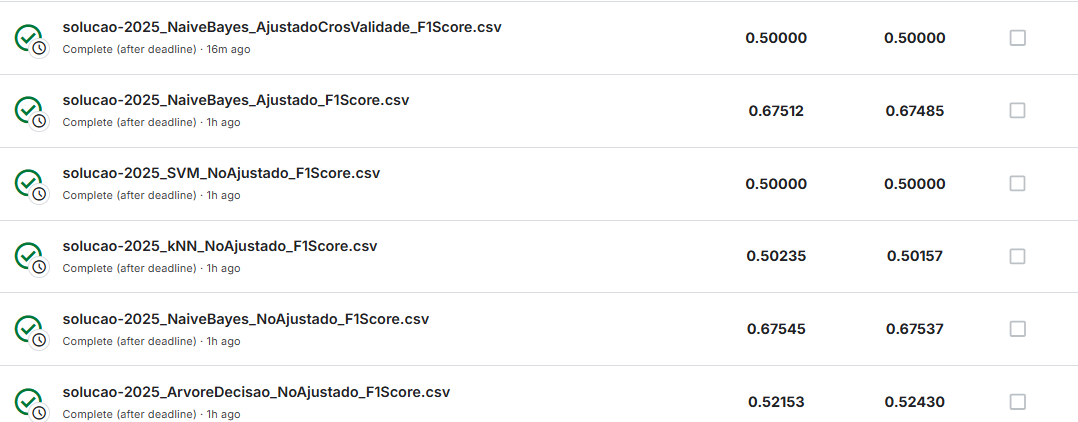

Consolidando os resultados de todas os F1 Macro encontrados chegou-se aos resultados mostrados na tabela abaixo

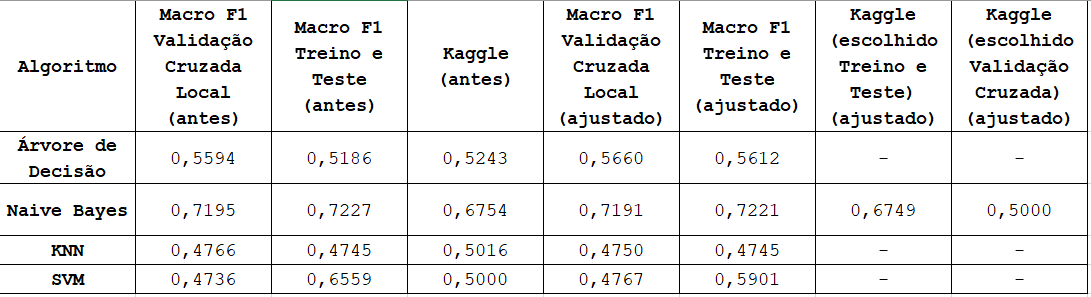

De um modo geral, a validação cruzada trouxe melhorias na predição dos modelos.A exceção fica a cargo do SVM que teve comportamento quase que aleatório. O melhor classificador em todos os testes foi o Naive Bayes, não sendo observado diferença significativa entre os testes com hiperparâmetros ajustados e não ajustados. Um diferença significativa aconteceu quando os dados preditos pelo Naive Bayes foram testados, após validação cruzada e ajustes, no Kaggle. O F1 macro foi de 0,50, sugerindo um overfiting do modelo.